<a href="https://colab.research.google.com/github/utsabsarkar12/Mall_Customer_Segmentation-ML_Project/blob/main/Online_Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
# Step 2: Load Dataset
file_path = "/content/file.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [6]:
# Step 3: Data Preprocessing

# Ensure Transaction_Date is datetime and fill missing values with a placeholder
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
df['Transaction_Date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

# Handle Month column (ensure it matches '%Y-%m' format)
if df['Month'].dtype == 'int64' or df['Month'].dtype == 'object':
    # Convert numeric months or string inconsistencies to 'YYYY-MM' format
    df['Month'] = df['Month'].apply(lambda x: f"2024-{int(x):02d}" if str(x).isdigit() else x)

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m', errors='coerce')

# Handle invalid Month entries
invalid_months = df[df['Month'].isna()]
if not invalid_months.empty:
    print("Invalid Month entries found and dropped:", invalid_months)
df.dropna(subset=['Month'], inplace=True)

# Fill other missing values with 0
df.fillna(0, inplace=True)

# Convert all categorical columns to strings before label encoding
categorical_columns = ['Gender', 'Location', 'Coupon_Status', 'Product_Category']
for col in categorical_columns:
    df[col] = df[col].astype(str)  # Ensure uniform string type for LabelEncoder

# Label encoding for categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


<ipython-input-6-3d26862d0557>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction_Date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)


In [7]:
# Check Null Value
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,0
Gender,0
Location,0
Tenure_Months,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0


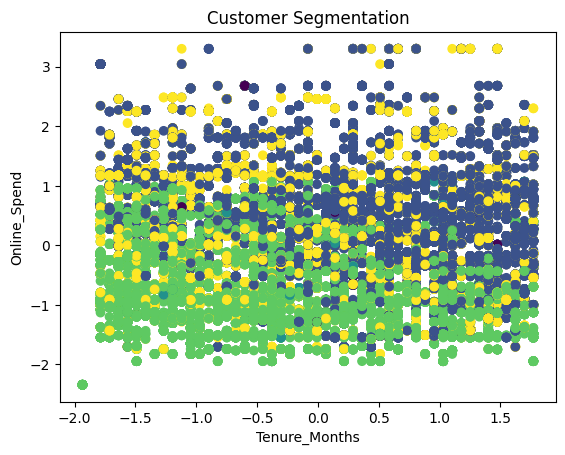

In [8]:
# Step 4: KMeans Clustering for Customer Segmentation
features = ['Tenure_Months', 'Online_Spend', 'Offline_Spend', 'Avg_Price', 'Delivery_Charges', 'Quantity']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)  # 5 clusters, adjust as needed
df['Customer_Segment'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Customer_Segment'], cmap='viridis')
plt.title("Customer Segmentation")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

In [9]:
# Step 5: Predict Customer Churn (Example with Logistic Regression)
# Assuming "Churn" column exists in your dataset
if 'Churn' in df.columns:
    X_churn = df[features]
    y_churn = df['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    print("Churn Prediction Accuracy:", accuracy_score(y_test, y_pred))

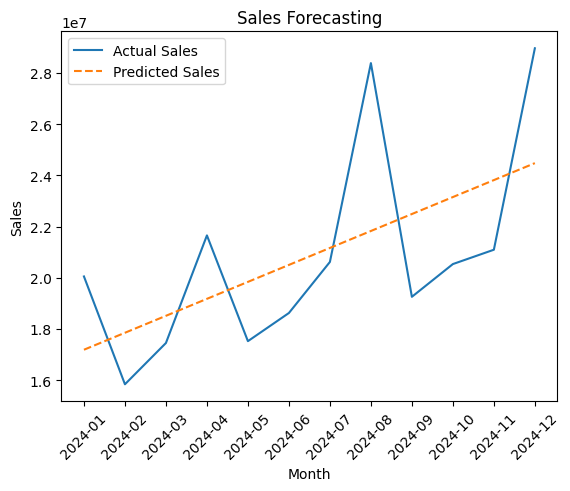

In [11]:
# Step 6: Sales Forecasting (Example with Linear Regression)
# Aggregating sales data
df['Total_Sales'] = df['Online_Spend'] + df['Offline_Spend']
df_monthly_sales = df.groupby(df['Month'].dt.to_period('M'))['Total_Sales'].sum().reset_index()

X_sales = np.array(range(len(df_monthly_sales))).reshape(-1, 1)
y_sales = df_monthly_sales['Total_Sales']
linear_reg = LinearRegression()
linear_reg.fit(X_sales, y_sales)
sales_forecast = linear_reg.predict(X_sales)

plt.plot(df_monthly_sales['Month'].astype(str), y_sales, label="Actual Sales")
plt.plot(df_monthly_sales['Month'].astype(str), sales_forecast, label="Predicted Sales", linestyle="--")
plt.legend()
plt.title("Sales Forecasting")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Step 7: Product Demand Prediction (Clustering or Regression)
X_product = df[['Product_Category', 'Quantity']]
kmeans_product = KMeans(n_clusters=5, random_state=42)
df['Product_Demand_Cluster'] = kmeans_product.fit_predict(X_product)

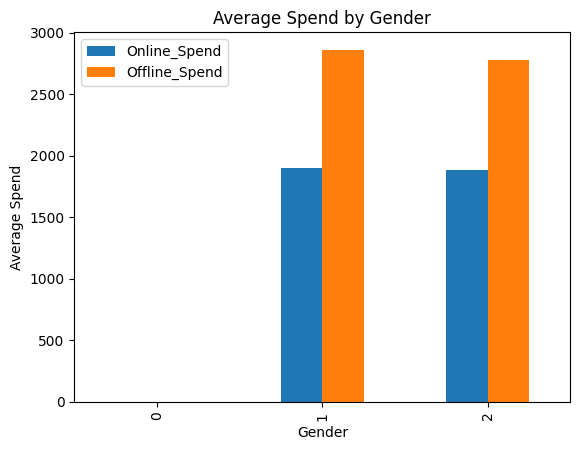

In [13]:
# Step 8: Gender-Based Insights
gender_group = df.groupby('Gender')[['Online_Spend', 'Offline_Spend']].mean()
gender_group.plot(kind='bar')
plt.title("Average Spend by Gender")
plt.ylabel("Average Spend")
plt.show()

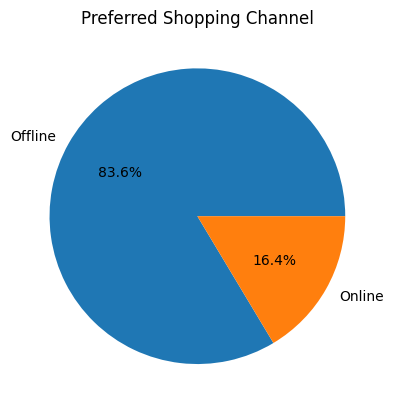

In [14]:
# Step 9: Predict Preferred Shopping Channel (Online vs Offline)
df['Preferred_Channel'] = np.where(df['Online_Spend'] > df['Offline_Spend'], 'Online', 'Offline')
channel_group = df.groupby('Preferred_Channel')['CustomerID'].count()
channel_group.plot(kind='pie', autopct='%1.1f%%', title="Preferred Shopping Channel")
plt.ylabel("")
plt.show()

In [15]:
# Save processed data for further use
df.to_csv("processed_data.csv", index=False)